<a href="https://colab.research.google.com/github/elkinbarretorojas/data_science/blob/main/Exploratory_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis (EDA) | Fuel Economy Prediction.

## Introduction

**What data are we exploring today ?**

The data-set can be downloaded from [here](https://www.kaggle.com/CooperUnion/cardataset). To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this opportunity, we will perform a Exploratory data analysis, make it ready for modeling, and predict the Fuel Economy (MPG).



---



## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA and Random Forect Regressor

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import chisquare
import math
import stats
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


## 2. Loading the data into the data frame.

In [94]:
df = pd.read_csv("raw_data.csv")
cars_data = df
# To display the top 5 rows
cars_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [95]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [96]:
cars_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Insights:

- Year: The minimum year in dataset is 1990, average year is 2010 and maximum year is 2017.
- Engine Hp:: The minimum hp in dataset is 55, average hp is 249 and maximum hp is 1001.
- Engine Cylinders: The minimum cylinders in dataset are 0, average cylinders are 5 and maximum cylindes are 16.
- Number of doors: The minimum doors a car have are 2, on average, the number of doors are 3 and maximum doors are 4.
- Highway mpg: The minimum highway mpg in dataset is 12, average highway mpg is 26.6 and maximum highway mpg is 354.
- City mpg: The minimum city mpg in dataset is 7, average city mpg is 19.7 and maximum city mpg is 137.
- Popularity: The minimum popularity of a car in dataset is 2, average car popularity is 1554.9 and maximum car popularity is 5657.
- Price: The minimum car price in dataset is 2000, average car price is 40K and maximum car price is 2.06 million.

## 3. Checking the types of data

In [97]:
cars_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 4. Renaming columns and dropping columns

In [98]:
cars_data.columns = cars_data.columns.str.lower().str.replace(" ", "_")

In [99]:
print('Number of duplicates are : ', cars_data.duplicated().sum())
cars_data = cars_data.drop_duplicates()

Number of duplicates are :  715


In [100]:
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())

Number of missing values in each columns are below : 
make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


From the above, we can conclude that Market column has a lot of null values. Then, we will drop that column.

In [101]:
cars_data = cars_data.drop(['market_category'], axis = 1)
#cars_data.head()

## 5. Handling missing or null values.

In [102]:
cars_data.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

Hp has null values. Hp will be filled by 0 as the cars having null values are electric cars. So they don't have Hp in general


In [103]:
cars_data.loc[cars_data['engine_hp'].isnull(),'engine_hp'] = cars_data['engine_hp'].fillna(0)
cars_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


We know that electric cars doesn't have any cylinders so the null values will be again filled with 0

In [104]:
engine_mode = cars_data['engine_cylinders'].mode()

In [105]:
cars_data.loc[cars_data['engine_cylinders'].isnull(),'engine_cylinders'] = cars_data['engine_cylinders'].fillna(4)

Fuel type null values will be fill with the mode found it before "regular unleaded" as this columns are categoricals.

In [106]:
cars_data.loc[cars_data['engine_fuel_type'].isnull(),'engine_fuel_type'] = cars_data['engine_fuel_type'].fillna('regular unleaded')

 Doors will be fill with Mean (Integer) as it is a numerical value. And we can not have decimal numbers here.

In [107]:
cars_data.loc[cars_data['number_of_doors'].isnull(),'number_of_doors'] = cars_data['number_of_doors'].fillna(cars_data['number_of_doors'].mean())

In [108]:
cars_data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

Now, we have a dataset without Null values.

## 6. Separating the numerical and categorical columns

In [109]:
num_col = cars_data.select_dtypes(include = [np.number])
cat_col = cars_data.select_dtypes(exclude = [np.number])
num_col

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


## 7. Detecting Outlierss

<Axes: >

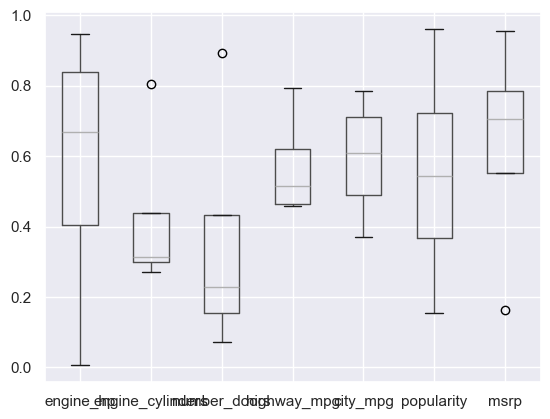

In [110]:
df = pd.DataFrame(data = np.random.random(size=(4,7)),columns = ['engine_hp', 'engine_cylinders','number_doors','highway_mpg','city_mpg','popularity','msrp'])
df.boxplot()

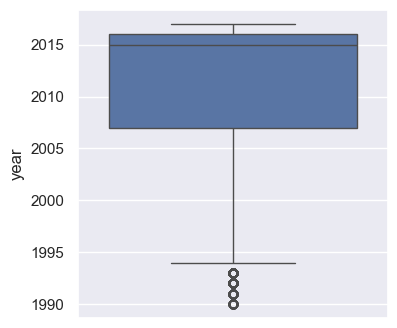

In [111]:
fig = plt.figure(figsize=(4, 4))
sns.boxplot(y=cars_data['year'], legend="full")
plt.show()

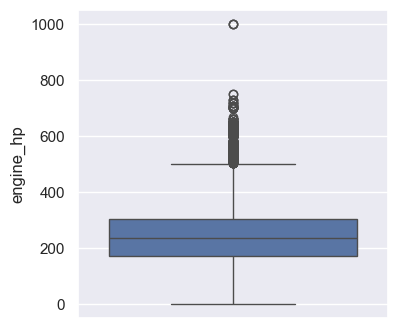

In [112]:
fig = plt.figure(figsize=(4, 4))
sns.boxplot(y=cars_data['engine_hp'], legend="full")
plt.show()

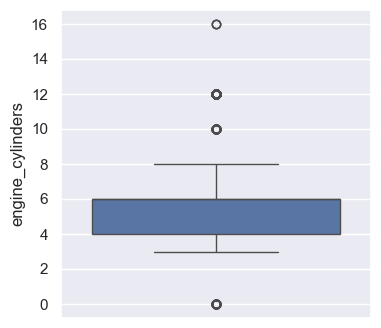

In [113]:
fig = plt.figure(figsize=(4, 4))
sns.boxplot(y=cars_data['engine_cylinders'], legend="full")
plt.show()

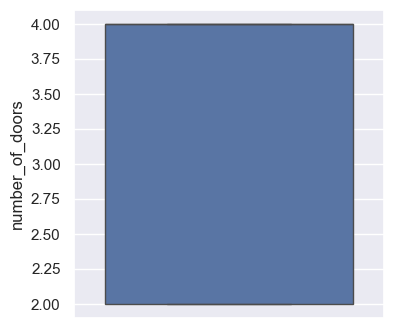

In [114]:
fig = plt.figure(figsize=(4, 4))
sns.boxplot(y=cars_data['number_of_doors'], legend="full")
plt.show()

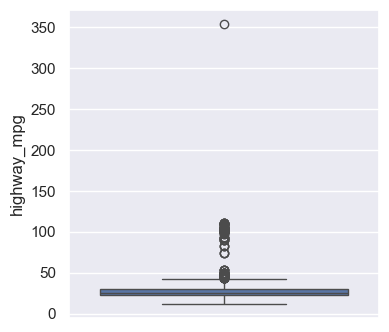

In [115]:
fig = plt.figure(figsize=(4, 4))
sns.boxplot(y=cars_data['highway_mpg'], legend="full")
plt.show()

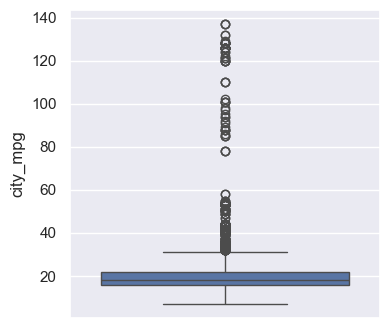

In [116]:
fig = plt.figure(figsize=(4, 4))
sns.boxplot(y=cars_data['city_mpg'], legend="full")
plt.show()

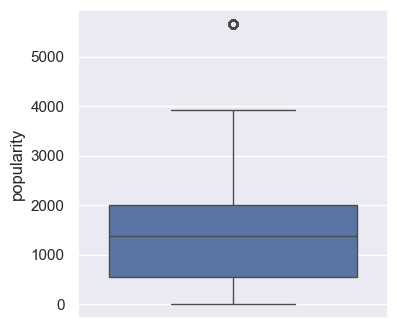

In [117]:
fig = plt.figure(figsize=(4, 4))
sns.boxplot(y=cars_data['popularity'], legend="full")
plt.show()

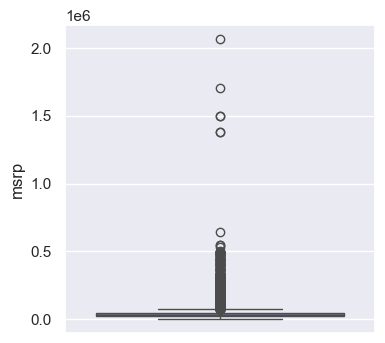

In [118]:
fig = plt.figure(figsize=(4, 4))
sns.boxplot(y=cars_data['msrp'], legend="full")
plt.show()

Insights
Engine Hp:: Any Hp above than 500 is an outlier.
Engine Cylinders: Cylinders above than 8 and lower than 3 are outliers.
Highway mpg: Any highway mpg below than 12 and higher than 42 is as an outlier.
City mpg: Any city mpg below than 7 and higher than 31 is as an outlier.
Price: Car prices lower than 2000 and upper than 70.9K is an outlier.

In [119]:
s1 = cars_data.shape
clean = cars_data[['year', 'engine_cylinders']]
for i in clean.columns:
    qt1 = cars_data[i].quantile(0.25)
    qt3 = cars_data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = cars_data[cars_data[i]<lower].index
    max_in = cars_data[cars_data[i]>upper].index
    cars_data.drop(min_in, inplace = True)
    cars_data.drop(max_in, inplace = True)
s2 = cars_data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

Deleted outliers are :  815


This case, we want to analyze the high hp cars that comes from Luxury brans. Then, we delete only the Years and Engine Cylinders (It can not be possible it has 0 cylinders)

In [120]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10384 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               10384 non-null  object 
 1   model              10384 non-null  object 
 2   year               10384 non-null  int64  
 3   engine_fuel_type   10384 non-null  object 
 4   engine_hp          10384 non-null  float64
 5   engine_cylinders   10384 non-null  float64
 6   transmission_type  10384 non-null  object 
 7   driven_wheels      10384 non-null  object 
 8   number_of_doors    10384 non-null  float64
 9   vehicle_size       10384 non-null  object 
 10  vehicle_style      10384 non-null  object 
 11  highway_mpg        10384 non-null  int64  
 12  city_mpg           10384 non-null  int64  
 13  popularity         10384 non-null  int64  
 14  msrp               10384 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ MB


### 8. Correlation
Heat_Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,engine_hp,engine_cylinders,number_doors,highway_mpg,city_mpg,popularity,msrp
engine_hp,1.000000,0.547973,-0.923328,0.598393,-0.151799,0.033503,0.239870
engine_cylinders,0.547973,1.000000,-0.478321,-0.105369,-0.829268,0.848709,0.141778
number_doors,-0.923328,-0.478321,1.000000,-0.335765,-0.052274,-0.042620,0.150318
highway_mpg,0.598393,-0.105369,-0.335765,1.000000,0.110772,-0.565178,0.730505
city_mpg,-0.151799,-0.829268,-0.052274,0.110772,1.000000,-0.840925,-0.460920
popularity,0.033503,0.848709,-0.042620,-0.565178,-0.840925,1.000000,-0.092562
msrp,0.239870,0.141778,0.150318,0.730505,-0.460920,-0.092562,1.000000


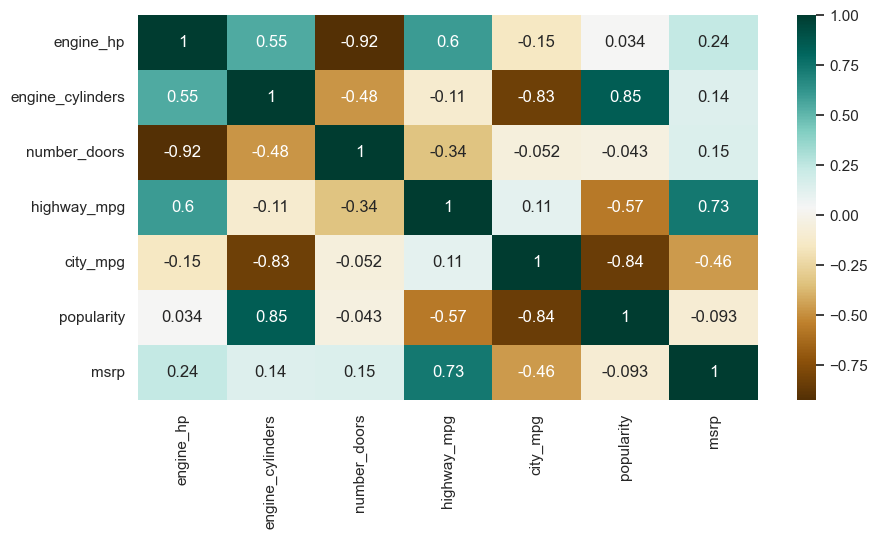

In [145]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Insights:
Strong correlations using pearson coefficient:
 + Positive: engine_cylinders and popularity | highway_mpg and msrp
 - Negative: engine_hp and numbers_doors | engine_cylynders and city_mpg | popularity and city_mpg 

**Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.**

## Thank you.